In [1]:
# Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [2]:
# Import file / Preview dataframe
samples = pd.read_csv('cleansamples.csv')
samples.head(5)

,Yr,Mn,Date,Date.1,CO2 [ppm],seasonally adjusted [ppm],fit [ppm],seasonally adjusted fit [ppm],CO2 filled [ppm],seasonally adjusted filled[ppm]
0,1969,1,25218,1969.0411,331.44,329.61,329.00,327.16,331.44,329.61
1,1969,2,25249,1969.1260,326.52,324.31,329.29,327.08,326.52,324.31
2,1969,3,25277,1969.2027,-99.99,-99.99,329.61,327.00,329.61,327.00
3,1969,4,25308,1969.2877,327.92,324.60,330.26,326.94,327.92,324.60
4,1969,5,25338,1969.3699,-99.99,-99.99,330.29,326.89,330.29,326.89


In [3]:
# Select Columns / Find means
overallMean = samples['CO2 filled [ppm]'].mean()

samples = samples[['Yr','CO2 filled [ppm]']]
samples = samples.groupby('Yr').mean()
co2 = samples['CO2 filled [ppm]']



In [4]:
samples.head(10)

,CO2 filled [ppm]
Yr,
1969,326.619167
1970,326.974167
1971,327.685833
1972,328.686667
1973,329.950000
1974,331.978333
1975,332.672500
1976,333.650000
1977,335.596667


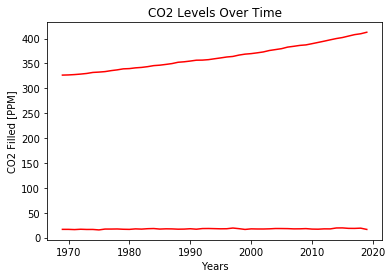

In [105]:
# Plot and save figure
plt.title('CO2 Levels Over Time')
plt.xlabel('Years')
plt.ylabel('CO2 Filled [PPM]')
plt.plot(samples,color='r')
plt.savefig('CO2Time.png')

In [115]:
# Import seawater temps
water = pd.read_csv('water_surface_temp.csv')
surfTemps = water[['YEAR','MONTH','DAY','SURF_TEMP_C']]
floorTemps = water[['YEAR','MONTH','DAY','BOT_TEMP_C']]

surfTemps = surfTemps.groupby('YEAR').mean()
surfTemps = surfTemps[1969:2019][['SURF_TEMP_C']]
surfTemps.head()

,SURF_TEMP_C
YEAR,
1969.0,16.669315
1970.0,16.660440
1971.0,16.205753
1972.0,16.893443
1973.0,16.466849


In [117]:
# Join dataframes
samples['Surf_Temp'] = surfTemps['SURF_TEMP_C']
samples.head()

,CO2 filled [ppm],Surf_Temp
Yr,,
1969,326.619167,16.669315
1970,326.974167,16.660440
1971,327.685833,16.205753
1972,328.686667,16.893443
1973,329.950000,16.466849


In [136]:
# Run T Test (-7.15 indicates a correlation)
stats.ttest_ind(samples['CO2 filled [ppm]'],samples['Surf_Temp'])

Ttest_indResult(statistic=97.32062809022928, pvalue=7.153738669134125e-101)

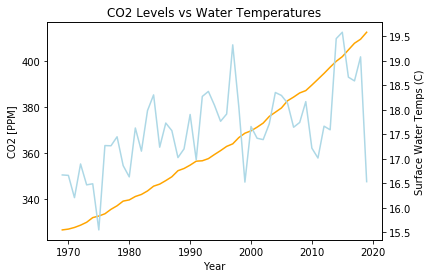

In [135]:
# Plot sea temps vs co2 levels

fig, ax1 = plt.subplots()
ax1.plot(samples['CO2 filled [ppm]'],color='orange')

ax2 = ax1.twinx() 
ax2.plot(samples['Surf_Temp'],color='lightblue')

plt.title('CO2 Levels vs Water Temperatures')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 [PPM]')
ax2.set_ylabel('Surface Water Temps (C)')

plt.savefig('CO2Water.png')